## MNIST dataset

The MNIST handwritten digit dataset consists of images of handwritten digits, together with labels indicating which digit is in each image. 

Becaue both the features and the labels are present in this dataset (and labels for large datasets are generally difficult/expensive to obtain), this dataset is frequently used as a benchmark to compare various methods. 
For example, [this webpage](http://yann.lecun.com/exdb/mnist/) describes a variety of different classification results on MNIST (Note, the tests on this website are for a larger and higher resolution dataset than we'll use.) To see a comparison of classification methods implemented in scikit-learn on the MNIST dataset, see 
[this page](http://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html).
The MNIST dataset is also a frequently used for benchmarking clustering algorithms and because it has labels, we can evaluate the homogeneity or purity of the clusters. 

There are several versions of the dataset. We'll use the one that is built-in to scikit-learn, described [here](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html). 

* Classes: 10  
* Samples per class: $\approx$180
* Samples total: 1797
* Dimensionality: 64 (8 pixels by 8 pixels)
* Features: integers 0-16

Here are some examples of the images. Note that the digits have been size-normalized and centered in a fixed-size ($8\times8$ pixels) image.

<img src="http://scikit-learn.org/stable/_images/sphx_glr_plot_digits_classification_001.png" width="500">

In [2]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
#import pandas as pd

from sklearn import metrics
from sklearn.datasets import make_blobs, make_moons, load_iris, load_digits
from sklearn.cluster import *
# from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph
from sklearn.metrics import homogeneity_score, homogeneity_completeness_v_measure
from sklearn.preprocessing import scale

from time import time

import pandas as pd

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.neighbors import DistanceMetric
from sklearn.model_selection import GridSearchCV
from sklearn.mixture import GaussianMixture

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
# Create color maps
cmap = ListedColormap(["Red","Green","Blue"])
# cmap = ListedColormap(["#e41a1c","#984ea3","#a65628","#377eb8","#ffff33","#4daf4a","#ff7f00"])
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')

<class 'numpy.ndarray'>
n_digits: 10, n_samples 1797, n_features 64


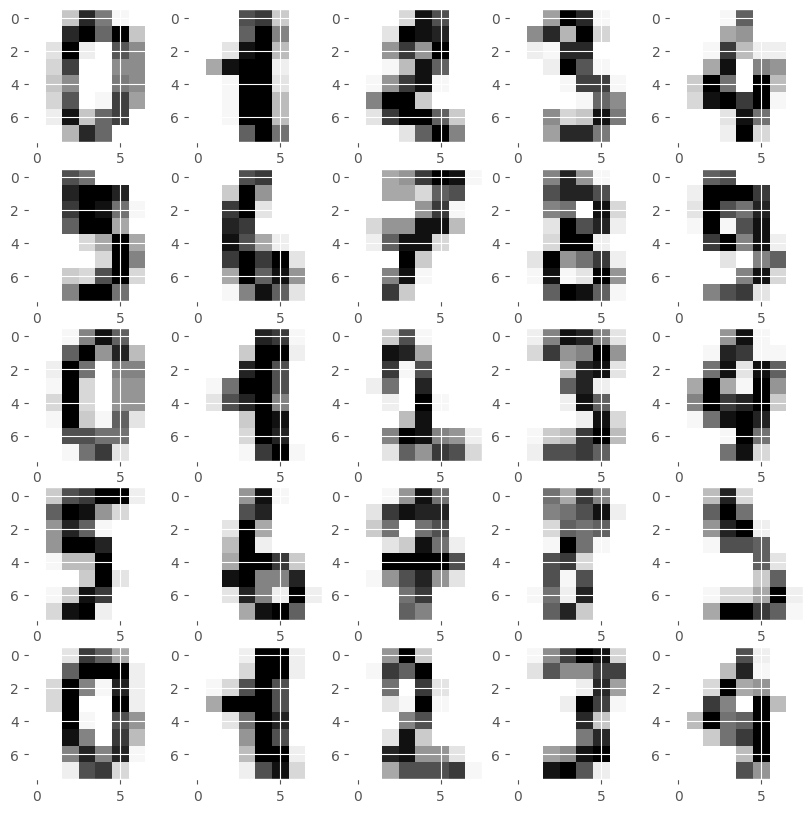

In [3]:
digits = load_digits()
X = digits.data
y = digits.target
print(type(X))

n_samples, n_features = X.shape
n_digits = len(np.unique(digits.target))
print("n_digits: %d, n_samples %d, n_features %d" % (n_digits, n_samples, n_features))

plt.figure(figsize= (10, 10))
for ii in np.arange(25):
    plt.subplot(5, 5, ii+1)
    plt.imshow(np.reshape(X[ii,:],(8,8)), cmap='Greys',interpolation='none')
plt.show()

## MNIST: visualization
**1:** Using PCA and T-SNE methods to project a 2D visualization of the dataset 

PCA vs T-SNE:

PCA works on preserving the global structure of the data whereas T-SNE preserves local structures.

Both PCA and T-SNE produce features which are hard to interpret. 

PCA works well when there is linear relation between features while T-SNE does a decent job even in non-linear dataset.

In [4]:
## Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled.shape)

(1797, 64)


In [5]:
# PCA with 2 components to project the data onto a 2D space
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

principal_df = pd.DataFrame(data = X_pca
             , columns = ['principal component 1', 'principal component 2'])
principal_df.shape

(1797, 2)

Text(0, 0.5, 'Principal Component 2')

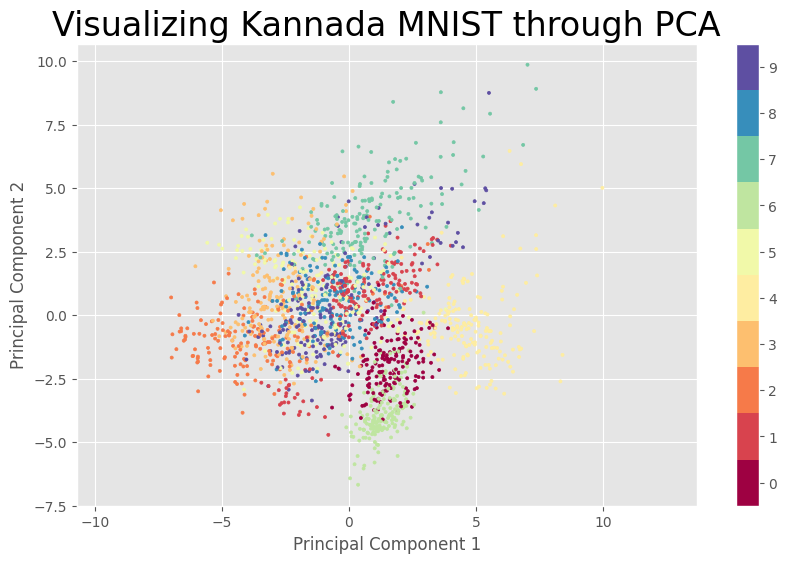

In [6]:

plt.scatter(X_pca[:, 0], X_pca[:, 1], s= 5, c=y, cmap='Spectral')
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('Visualizing Kannada MNIST through PCA', fontsize=24);
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

In [7]:
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X_scaled)

tsne_df = pd.DataFrame(data = X_tsne
             , columns = ['principal component 1', 'principal component 2'])
tsne_df.shape

(1797, 2)

Text(0, 0.5, 'Principal Component 2')

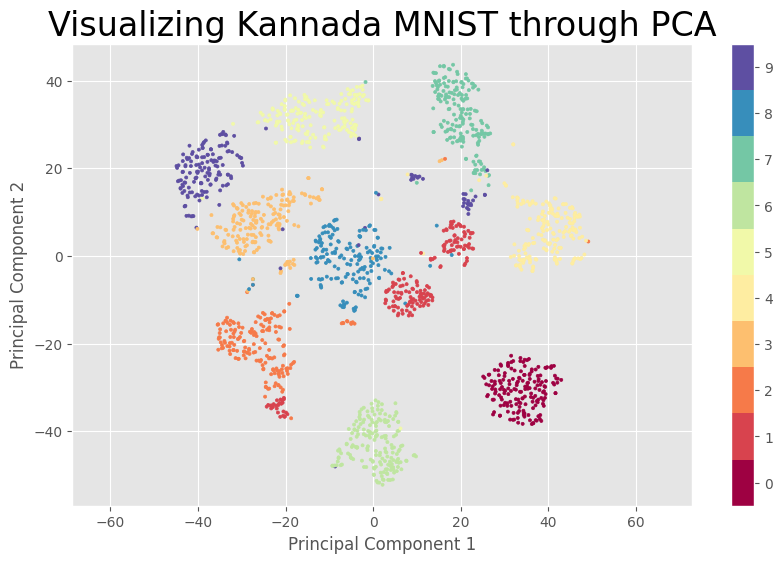

In [8]:
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], s= 5, c=y, cmap='Spectral')
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('Visualizing Kannada MNIST through PCA', fontsize=24);
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

## MNIST:  clustering
**1:** Using k-means method to cluster the dataset and compute the homogeneity score for the clustering. 

Homogenity: A perfectly homogeneous clustering is one where each cluster has data-points belonging to the same class label.

Homogeneity describes the closeness of the clustering algorithm to this perfection.

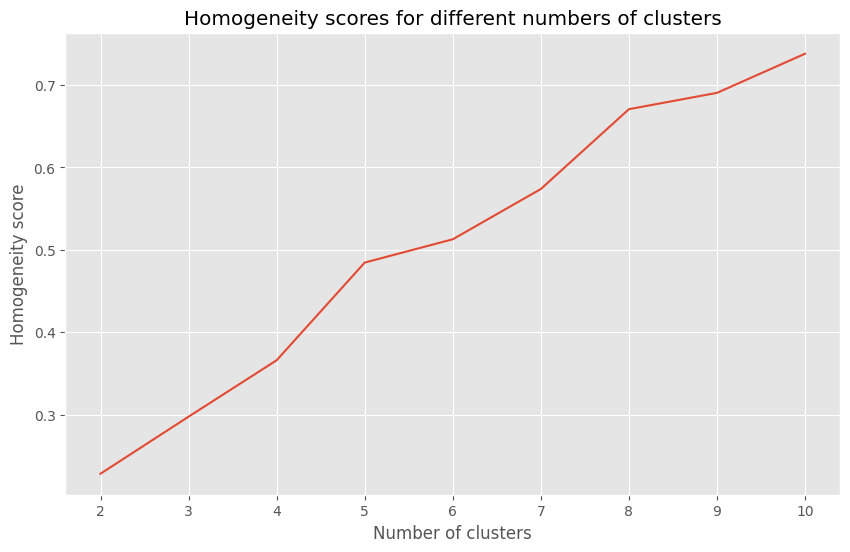

Optimal values: init = k-means++, n_init = 1


In [9]:
n_clusters_values = range(2, 11)

scores = []

for n_clusters in n_clusters_values:
    kmeans = KMeans(n_clusters=n_clusters)
    cluster_labels = kmeans.fit_predict(X)
    score = homogeneity_score(y, cluster_labels)
    scores.append(score)

plt.plot(n_clusters_values, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Homogeneity score')
plt.title('Homogeneity scores for different numbers of clusters')
plt.show()

optimal_n_clusters = n_clusters_values[np.argmax(scores)]

param_grid = {'init': ['k-means++', 'random'], 'n_init': [1,2,3,4,5,10]}
kmeans = KMeans(n_clusters=optimal_n_clusters)
grid_search = GridSearchCV(kmeans, param_grid, cv=5, scoring=homogeneity_score)
grid_search.fit(X, y)

print(f'Optimal values: init = {grid_search.best_params_["init"]}, n_init = {grid_search.best_params_["n_init"]}')

In [10]:
kmeans = KMeans(n_clusters=10, n_init=1, init="k-means++")
kmeans.fit(X)

cluster_labels = kmeans.labels_

score = homogeneity_score(y, cluster_labels)
print(f'Homogeneity score: {score:.3f}')

Homogeneity score: 0.740



**2:** Using a hierarchical clustering method to cluster the dataset.


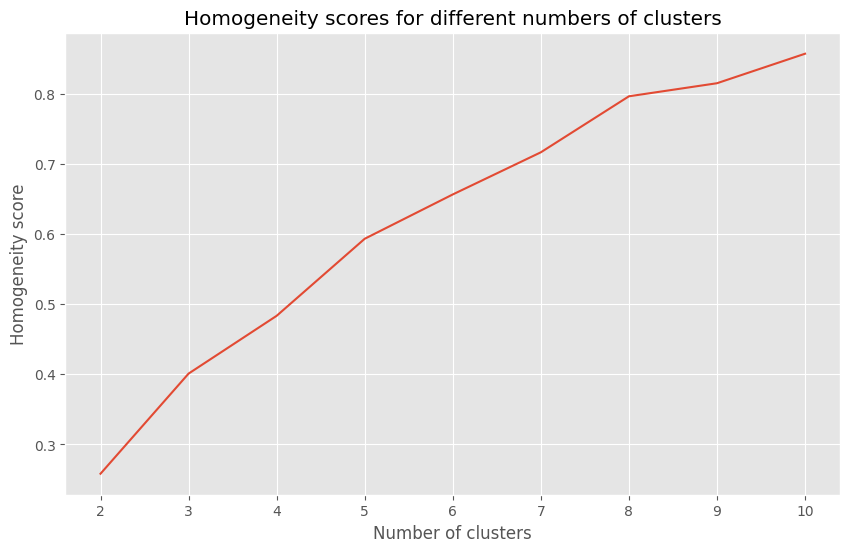

Optimal values: linkage = ward


In [11]:
n_clusters_values = range(2, 11)

scores = []

for n_clusters in n_clusters_values:
    hierarchical_clustering = AgglomerativeClustering(n_clusters=n_clusters)
    cluster_labels = hierarchical_clustering.fit_predict(X)
    score = homogeneity_score(y, cluster_labels)
    scores.append(score)

plt.plot(n_clusters_values, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Homogeneity score')
plt.title('Homogeneity scores for different numbers of clusters')
plt.show()

optimal_n_clusters = n_clusters_values[np.argmax(scores)]

param_grid = {'linkage': ['ward', 'average', 'complete']}
agglomerative = AgglomerativeClustering(n_clusters=optimal_n_clusters)
grid_search = GridSearchCV(agglomerative, param_grid, cv=5, scoring=homogeneity_score)
grid_search.fit(X, y)

print(f'Optimal values: linkage = {grid_search.best_params_["linkage"]}')

In [12]:
hierarchical_clustering = AgglomerativeClustering(n_clusters=10,compute_distances=True,linkage='ward')
hierarchical_clustering.fit(X)

cluster_labels = hierarchical_clustering.labels_

score = homogeneity_score(y, cluster_labels)
print(f'Homogeneity score: {score:.3f}')

Homogeneity score: 0.858


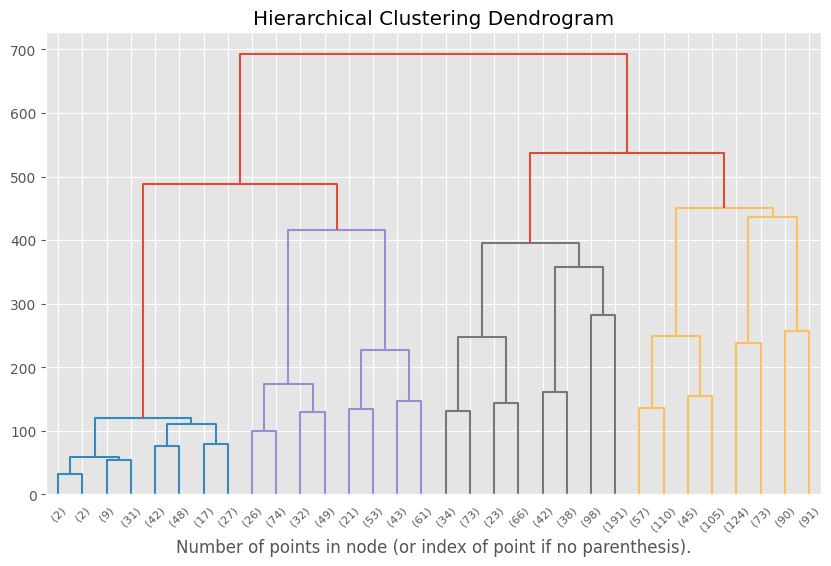

In [13]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

plt.title('Hierarchical Clustering Dendrogram')
# plot the top 4 levels of the dendrogram
plot_dendrogram(hierarchical_clustering, truncate_mode='level', p=4)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

Credit for visualization code: [Link](https://stackoverflow.com/questions/68567522/agglomerative-clustering-hierarchy-visualization)

**When using hierarchical clustering, the homogeneity score went up.**

**3.** Using DBScan to cluster the dataset.

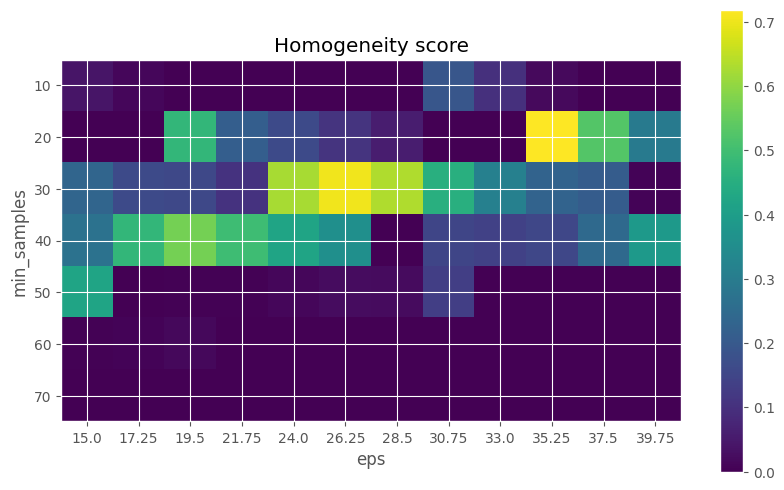

In [14]:
eps_values = [*np.arange(15,40,2.25)]
min_samples_values = [*np.arange(10,80,10)]

scores = []

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
        cluster_labels = dbscan.labels_
#         if (len(np.unique(cluster_labels))>1):
        score = homogeneity_score(y, cluster_labels)
        scores.append(score)

#  Reshape the scores list into a matrix with one row for each value of eps and one column for each value of min_samples
scores = np.array(scores).reshape(len(min_samples_values), len(eps_values))

# Create a heatmap to visualize the scores
plt.imshow(scores, cmap='viridis')
plt.colorbar()
plt.xticks(np.arange(len(eps_values)), eps_values)
plt.yticks(np.arange(len(min_samples_values)), min_samples_values)
plt.xlabel('eps')
plt.ylabel('min_samples')
plt.title('Homogeneity score')
plt.show() 

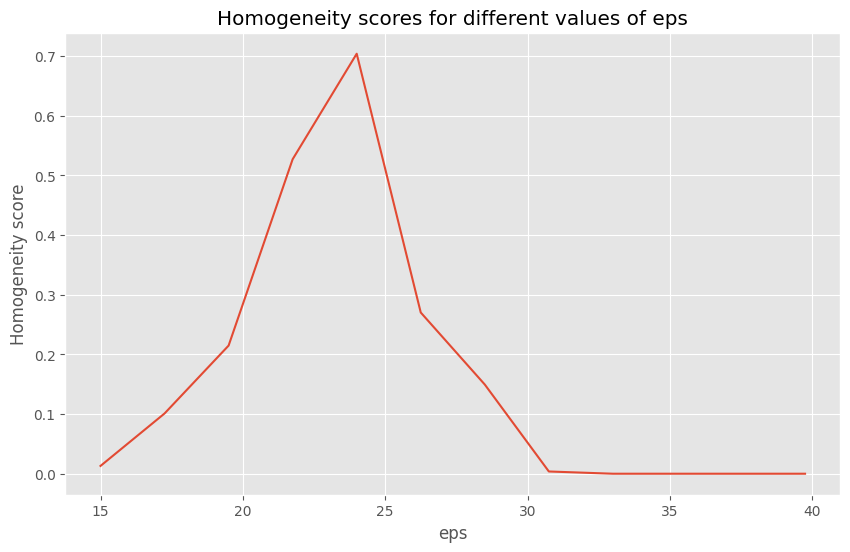

Optimal values: eps = 23.9, min_samples = 18


In [15]:
min_samples = 20
scores = []
for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    cluster_labels = dbscan.fit_predict(X)
    score = homogeneity_score(y, cluster_labels)
    scores.append(score)

# Ploting the homogeneity scores as a function of eps
plt.plot(eps_values, scores)
plt.xlabel('eps')
plt.ylabel('Homogeneity score')
plt.title('Homogeneity scores for different values of eps')
plt.show()

optimal_eps = eps_values[np.argmax(scores)]

# Using grid search to find the optimal values of eps and min_samples
param_grid = {'eps': [optimal_eps - 0.1, optimal_eps, optimal_eps + 0.1],
              'min_samples': [min_samples - 2, min_samples, min_samples + 2]}
dbscan = DBSCAN()
grid_search = GridSearchCV(dbscan, param_grid, cv=5, scoring=homogeneity_score)
grid_search.fit(X_scaled, y)

# Printing the optimal values of eps and min_samples
print(f'Optimal values: eps = {grid_search.best_params_["eps"]}, min_samples = {grid_search.best_params_["min_samples"]}')



In [16]:
# distance_metric = DistanceMetric.get_metric('euclidean') 
# distances = distance_metric.pairwise(X)
# mean_distance = distances.mean()
# std_distance = distances.std()

# eps = mean_distance + std_distance
# print(eps)


dbscan = DBSCAN(eps=23.9,min_samples=18)
dbscan.fit(X)

cluster_labels = dbscan.labels_

score = homogeneity_score(y, cluster_labels)
print(f'Homogeneity score: {score:.3f}')

Homogeneity score: 0.706


**4.** Using Gausian Mixture Models to cluster the dataset.

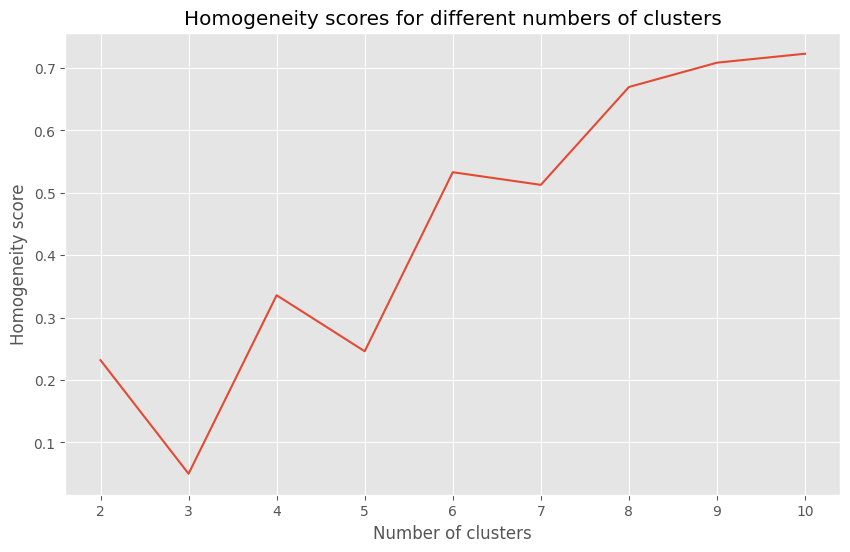

Optimal values: covariance_type = full


In [17]:
n_clusters_values = range(2, 11)

scores = []

for n_clusters in n_clusters_values:
    gmm = GaussianMixture(n_components=n_clusters)
    cluster_labels = gmm.fit_predict(X)
    score = homogeneity_score(y, cluster_labels)
    scores.append(score)

# Ploting the homogeneity scores as a function of n_clusters
plt.plot(n_clusters_values, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Homogeneity score')
plt.title('Homogeneity scores for different numbers of clusters')
plt.show()

# Using the elbow method to determine the optimal number of clusters
optimal_n_clusters = n_clusters_values[np.argmax(scores)]

# Using grid search to find the optimal values of the variances of the Gaussian distributions
param_grid = {'covariance_type': ['full', 'tied', 'diag', 'spherical']}
gmm = GaussianMixture(n_components=optimal_n_clusters)
grid_search = GridSearchCV(gmm, param_grid, cv=5, scoring=homogeneity_score)
grid_search.fit(X, y)

# Printing the optimal values of the variances of the Gaussian distributions
print(f'Optimal values: covariance_type = {grid_search.best_params_["covariance_type"]}')

In [18]:
gmm = GaussianMixture(n_components=10, covariance_type='full')
gmm.fit(X)

cluster_labels = gmm.fit_predict(X)

score = homogeneity_score(y, cluster_labels)
print(f'Homogeneity score: {score:.3f}')

Homogeneity score: 0.793


In [19]:
print(50 * '_')
print('% 9s' % 'method' + '                   time' + '      homo')
def compare_method(estimator, name, data):
    t0 = time()
    estimator.fit(data)
    print('% 25s   %.2fs     %.3f ' % (name, (time() - t0), metrics.homogeneity_score(y, estimator.labels_)))


kmeans = KMeans(n_clusters=10, n_init=1, init="k-means++")
compare_method(estimator=kmeans, name="KMeans", data=X)

hierarchical_clustering = AgglomerativeClustering(n_clusters=10,compute_distances=True,linkage='ward')
compare_method(estimator=hierarchical_clustering, name="Hierarchical Clustering", data=X)

dbscan = DBSCAN(eps=23.9,min_samples=18)
compare_method(estimator=dbscan, name="DBSCAN", data=X)

# gmm = GaussianMixture(n_components=10, covariance_type='full')
# compare_method(estimator=gmm, name="Gaussian Mixture", data=X)

__________________________________________________
   method                   time      homo
                   KMeans   0.02s     0.748 
  Hierarchical Clustering   0.16s     0.858 
                   DBSCAN   0.02s     0.706 
